In [1]:
# keras
import keras
print(keras.__version__)
import tensorflow
print(tensorflow.__version__)

C:\Users\acorn\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


2.2.2
1.9.0


In [2]:
# dense = fully connected
# dense의 output = activation(dot(input, kernel) + bias)

from keras.models import Sequential
from keras.layers import Dense, Activation
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

model = Sequential([
    Dense(32, input_shape=(784, )),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, show_shapes=True, to_file='network.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [3]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt

np.random.seed(0)
number_of_features = 10000
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=number_of_features)

tokenizer = Tokenizer(num_words=number_of_features)
train_features = tokenizer.sequences_to_matrix(train_data, mode="binary")
test_features = tokenizer.sequences_to_matrix(test_data, mode="binary")

In [4]:
# text vectorize방식
# tf-idf(document - term), bag of word, skip-gram방식
network = models.Sequential()
network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation='relu'))
network.add(layers.Dense(units=1, activation='sigmoid'))
network.compile(loss='binary_crossentropy', 
               optimizer='rmsprop',
               metrics=['accuracy'])

In [5]:
history = network.fit(train_features,
                     train_target,
                     epochs=15,
                     verbose=0, # 실행중 메세지 출력 여부
                     batch_size=1000,
                     validation_data=(test_features, test_target))

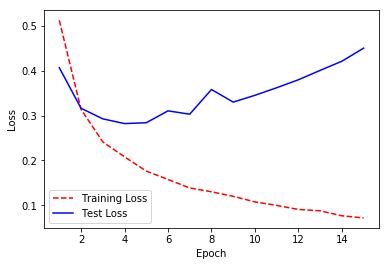

In [6]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

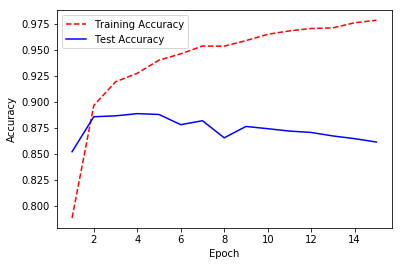

In [7]:
training_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']
epoch_count = range(1, len(training_accuracy) + 1)
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
seed = 777
np.random.seed(seed)

dataset = np.loadtxt("pima-indians-diabetes.data.csv", delimiter=',')

X = dataset[:, 0:8]
Y = dataset[:,8]
model = KerasClassifier(build_fn=create_model, verbose=0)

batch_size=[10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer = optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_gr_id, n_jobs=-1)
grid_result = grid.fit(X, Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))



(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


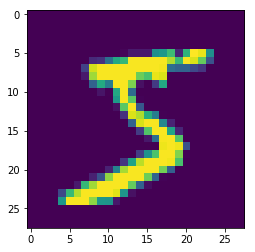

In [8]:
from keras.datasets import mnist
import matplotlib.pylab as plt
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)
X_train0[0]

plt.imshow(X_train0[0])
plt.grid(False)
plt.show()

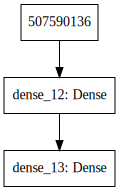

In [12]:
from keras.utils import np_utils
from keras.optimizers import SGD

X_train = X_train0.reshape(60000, 784).astype('float32')/255.0
X_test = X_test0.reshape(10000, 784).astype('float32')/255.0

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

model = Sequential()
model.add(Dense(15, input_dim=784, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=['accuracy'])
SVG(model_to_dot(model).create(prog='dot', format='svg'))

C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 1s - loss: 0.1007 - acc: 0.2042 - val_loss: 0.0888 - val_acc: 0.3160
Epoch 2/30
 - 1s - loss: 0.0879 - acc: 0.3466 - val_loss: 0.0869 - val_acc: 0.3724
Epoch 3/30
 - 1s - loss: 0.0853 - acc: 0.4019 - val_loss: 0.0833 - val_acc: 0.4290
Epoch 4/30
 - 1s - loss: 0.0809 - acc: 0.4597 - val_loss: 0.0781 - val_acc: 0.4845
Epoch 5/30
 - 1s - loss: 0.0755 - acc: 0.5105 - val_loss: 0.0725 - val_acc: 0.5303
Epoch 6/30
 - 1s - loss: 0.0701 - acc: 0.5552 - val_loss: 0.0673 - val_acc: 0.5844
Epoch 7/30
 - 1s - loss: 0.0652 - acc: 0.6005 - val_loss: 0.0626 - val_acc: 0.6285
Epoch 8/30
 - 1s - loss: 0.0607 - acc: 0.6438 - val_loss: 0.0583 - val_acc: 0.6683
Epoch 9/30
 - 1s - loss: 0.0567 - acc: 0.6802 - val_loss: 0.0545 - val_acc: 0.7043
Epoch 10/30
 - 1s - loss: 0.0532 - acc: 0.7120 - val_loss: 0.0512 - val_acc: 0.7293
Epoch 11/30
 - 1s - loss: 0.0501 - acc: 0.7371 - val_loss: 0.0482 - val_acc: 0.7548
Epoch 12/30
 - 1s - loss: 0.0473 - 

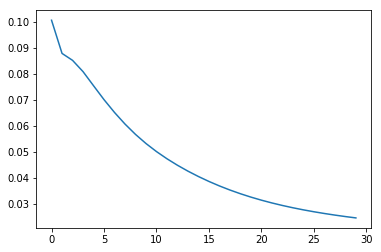

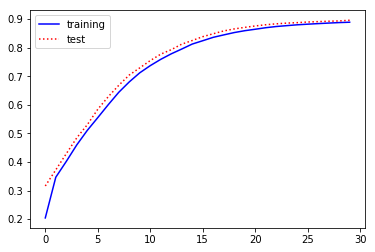

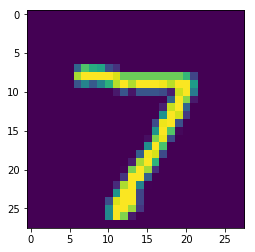

array([7], dtype=int64)

In [13]:
hist = model.fit(X_train, Y_train, nb_epoch=30, batch_size=100, validation_data = (X_test, Y_test), verbose=2)

plt.plot(hist.history['loss'])
plt.show()

plt.plot(hist.history['acc'], 'b-', label='training')
plt.plot(hist.history['val_acc'], 'r:', label='test')
plt.legend()
plt.show()

plt.imshow(X_test0[0, :])
plt.grid(False)
plt.show()
model.predict(X_test[:1,:])
model.predict_classes(X_test[:1,:], verbose=0)

In [ ]:
from keras.models import load_model 
model2 = load_model('my_model.hdf5')
model2.predict_classes(X_test[:1,:], verbose=0)

In [22]:
# 회귀
import pandas
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 공백으로 데이터 분리

dataframe = pandas.read_csv("housing.csv", delim_whitespace=True,
                           header = None)

dataset = dataframe.values
X = dataset[:, 0:13]
Y = dataset[:, 13]

def baseline_model():
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal',
                   activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [23]:
# 정규화한 모델
np.random.seed(777)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model,
                                        epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=777)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -28.73 (27.71) MSE


In [24]:
# 레이어를 추가하고 생성한 모델
def larger_model():
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal',
                   activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
seed = 7
np.random.seed(seed)
estimator = KerasRegressor(build_fn=wider_model, nb_epoch=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, )

In [29]:
%pylab inline
from sklearn.datasets import make_moons
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
X, Y = make_moons(noise = 0.2, random_state=0, n_samples=1000)
X = scale(X)
X_train, X_Test, Y_train, Y_test = train_test_split(X,Y, test_size=.5)

Populating the interactive namespace from numpy and matplotlib


C:\Users\acorn\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


[Text(0,0.5,'Y'),
 Text(0.5,0,'X'),
 Text(0.5,1,'Toy binary classification data set')]

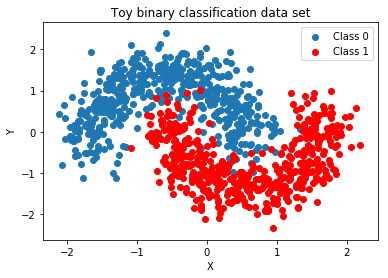

In [31]:
fig, ax = plt.subplots()
ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set')

In [32]:
model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='AdaDelta',
             loss='binary_crossentropy',
             metrics=['accuracy'])
tb_callback = keras.callbacks.TensorBoard(log_dir='/Graph/model_1',
                                         histogram_freq=0, write_graph=True,
                                         write_images=False)

In [33]:
model.fit(X_train, Y_train, batch_size=32, epochs=200, verbose=0,
         validation_data=(X_test, Y_test), callbacks=[tb_callback])
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss", score[0])
print("Test accuracy:", score[1])

Test loss 2.3234691829681395
Test accuracy: 0.45799999952316284


In [34]:
grid = np.mgrid[-3:3:100j, -3:3:100j]
grid_2d = grid.reshape(2, -1).T
X, Y = grid
prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)

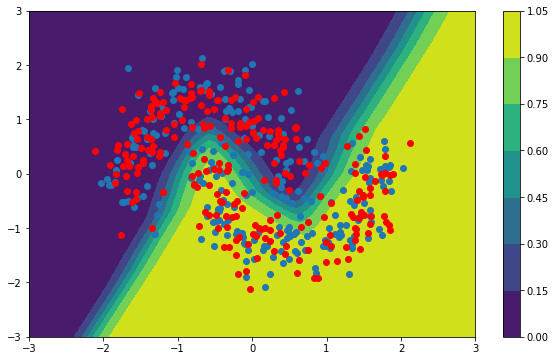

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
contour = ax.contourf(X, Y, prediction_probs.reshape(100, 100))
ax.scatter(X_test[Y_test==0, 0], X_test[Y_test==0, 1])
ax.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)

In [38]:
import math
seed = 777
np.random.seed(seed)
dataframe = pandas.read_csv("air-passengers.csv", usecols=[1], engine="python", skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype("float32")
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset), :]

In [39]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = list(), list()
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [47]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 1s - loss: 78604.0319
Epoch 2/200
 - 0s - loss: 67253.9628
Epoch 3/200
 - 0s - loss: 59891.8525
Epoch 4/200
 - 0s - loss: 54072.2342
Epoch 5/200
 - 0s - loss: 48444.7749
Epoch 6/200
 - 0s - loss: 42011.5634
Epoch 7/200
 - 0s - loss: 35025.6839
Epoch 8/200
 - 0s - loss: 27282.5974
Epoch 9/200
 - 0s - loss: 19609.9100
Epoch 10/200
 - 0s - loss: 12806.2988
Epoch 11/200
 - 0s - loss: 7690.7466
Epoch 12/200
 - 0s - loss: 4339.4855
Epoch 13/200
 - 0s - loss: 2442.3445
Epoch 14/200
 - 0s - loss: 1519.9634
Epoch 15/200
 - 0s - loss: 1137.5777
Epoch 16/200
 - 0s - loss: 1006.0852
Epoch 17/200
 - 0s - loss: 958.0899
Epoch 18/200
 - 0s - loss: 944.9127
Epoch 19/200
 - 0s - loss: 941.4242
Epoch 20/200
 - 0s - loss: 936.0190
Epoch 21/200
 - 0s - loss: 934.2268
Epoch 22/200
 - 0s - loss: 933.9571
Epoch 23/200
 - 0s - loss: 933.8136
Epoch 24/200
 - 0s - loss: 932.7634
Epoch 25/200
 - 0s - loss: 930.8601
Epoch 26/200
 - 0s - loss: 937.5860
Epoch 27/200
 - 0s - loss: 931.0044
Epoch 28/20

In [48]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

In [49]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(trainPredict)+ (look_back*2) + 1 : len(dataset)-1,:] = testPredict

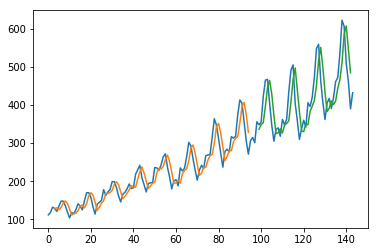

In [50]:
%matplotlib inline
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# iris 데이터를 loading하고  keras classifier를 이용해서 가장 적합한 batch_size, optimizer, learning_rate선정

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

seed = 777
np.random.seed(seed)

dataset = pd.read_csv("iris.csv")
dataset

C:\Users\acorn\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


,120,4,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
5,4.4,3.2,1.3,0.2,0
6,5.4,3.4,1.5,0.4,0
7,6.9,3.1,5.1,2.3,2
8,6.7,3.1,4.4,1.4,1
9,5.1,3.7,1.5,0.4,0


In [ ]:
dataset = np.array(dataset)
X = dataset[:, 0:4]
Y = dataset[:,[-1]]
model = KerasClassifier(build_fn=create_model, verbose=0)

batch_size=[10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer = optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_gr_id, n_jobs=-1)
grid_result = grid.fit(X, Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))